# **Project Title : Seoul Bike Sharing Demand Prediction**

## **Business Context**

**1. Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.** 

**2. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.** 

**3. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

## **Data Description**

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information:**

**Date : year-month-day**

**Rented Bike count - Count of bikes rented at each hour**

**Hour - Total hour rented for the day**

**Temperature-Temperature of that day in Celsius**

**Humidity - %**

**Windspeed - m/s**

**Visibility - 10m**

**Dew point temperature - Indicate the dew point temperature in Celsius**

**Solar radiation - MJ/m2**

**Rainfall - mm**

**Snowfall - cm**

**Seasons - Winter, Spring, Summer, Autumn**

**Holiday - Holiday/No holiday**

**Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)**

## **Project Architecture**

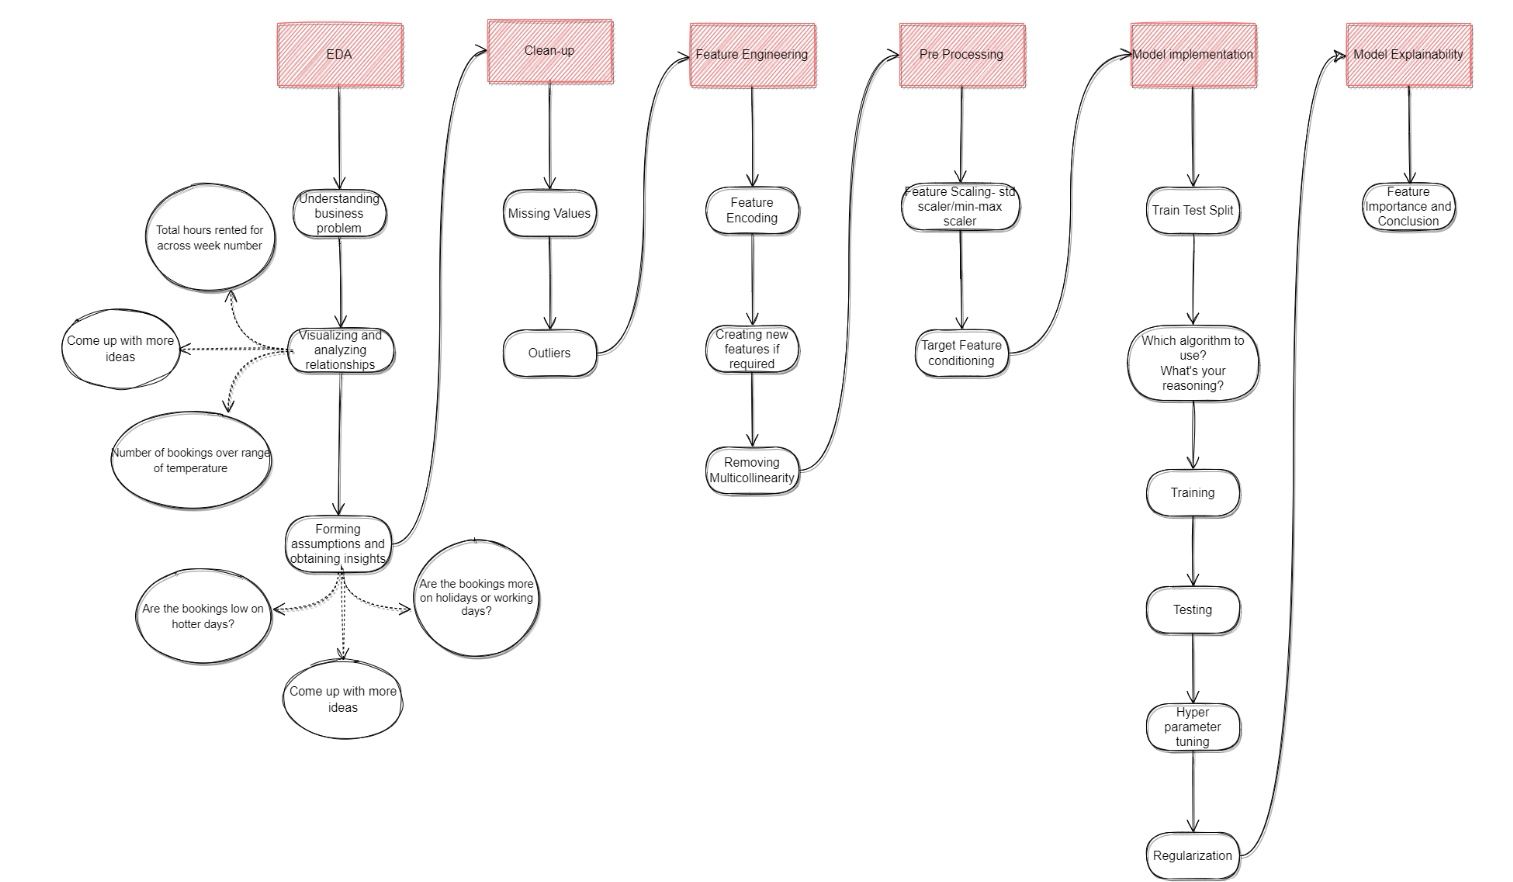

# **1. Preprocessing**

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing Libraries**

In [83]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

### **Loading Dataset**

In [3]:
#data import
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Bike Project/SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
# First 5 observation of the dataset
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# last  observation of the dataset

data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# check the shape of dataset

data.shape

(8760, 14)

The dataset has total 8760 observations and 14 columns.In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.*

In [7]:
#lets see all the variable names

data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Cleaning Dataset**

In [8]:
#check for duplicates
len(data[data.duplicated()])

0

In [9]:
# get data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Why do we need to handle missing values?**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [10]:
# Checking NULL values

data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

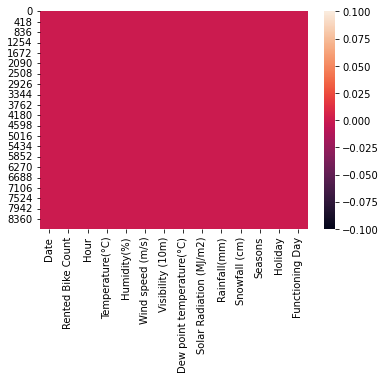

In [11]:
sns.heatmap(data.isnull())

There not a single missing or NULL value in the dataset, It means its ready to do analysis.

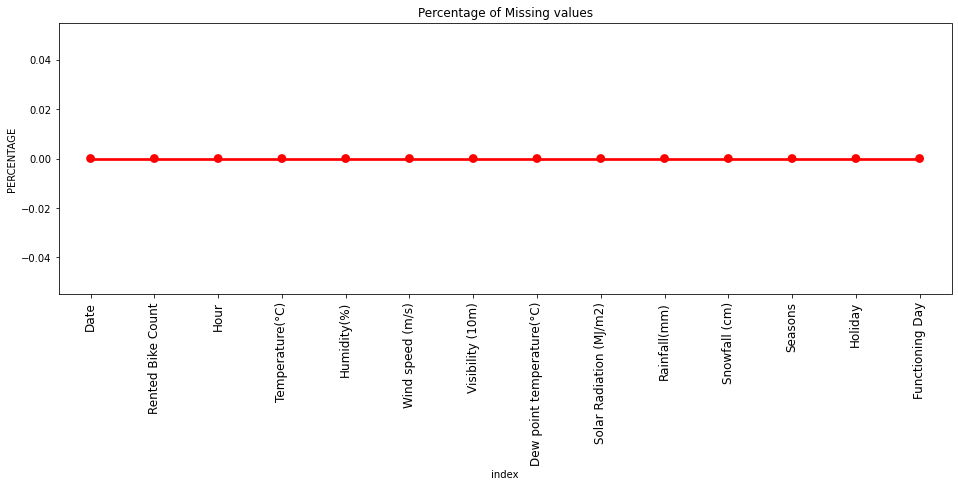

In [12]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing,color='r')
plt.xticks(rotation =90,fontsize =12)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# **2. EDA (Exploratory Data Analysis)**


**An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.**



## **2.1 Statistical Analysis**

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Here, we did not found any unusual behaviour or pattern in our dataset. The whole dataset is statistcally correct and ready to use for modelling.

**Let's rename the columns for easy understanding**

In [14]:
# Renaming Columns
data.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [15]:
data.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Now we can see that our data is ready for some feature engineering task, So let's do it in the next step.**

## **Categorical Feature Analysis**

### **Bike rent count on holiday and non holiday**

In [16]:
df_holiday=data.groupby(['holiday'])['bike_count'].sum()

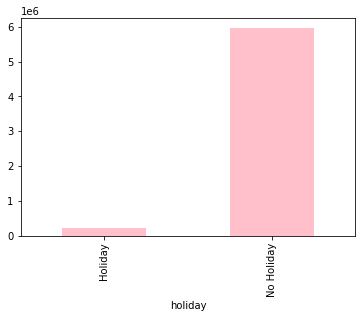

In [17]:
df_holiday.plot.bar(color='pink')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

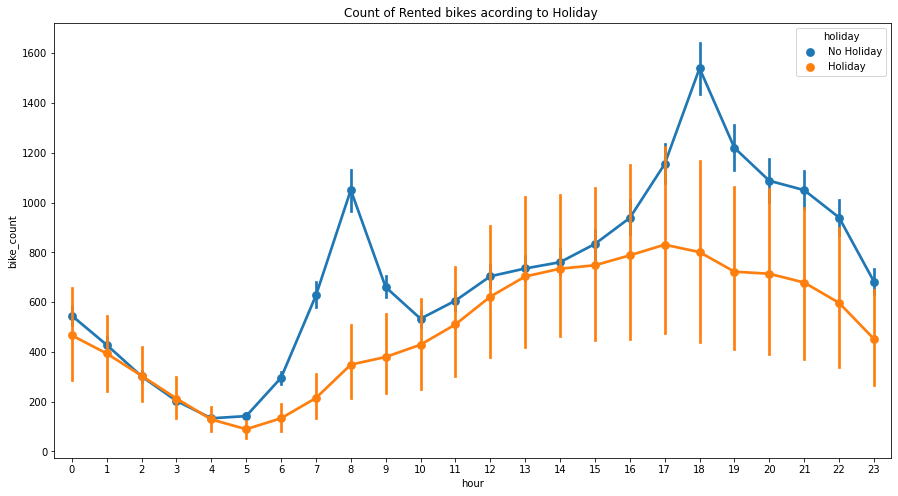

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data=data,x='hour',y='bike_count',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

### **Bike rent count in each season**

In [19]:
df=data.groupby(['season'])['bike_count'].sum()
df


season
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: bike_count, dtype: int64

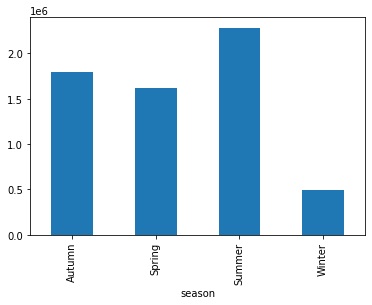

In [20]:
df.plot.bar()

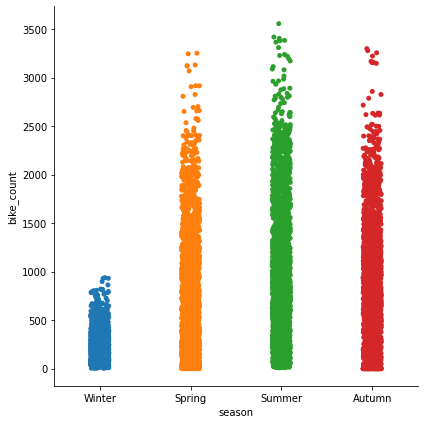

In [21]:
#plot for rented bike count seasonly

sns.catplot(x='season',y='bike_count',data=data, size=6)

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

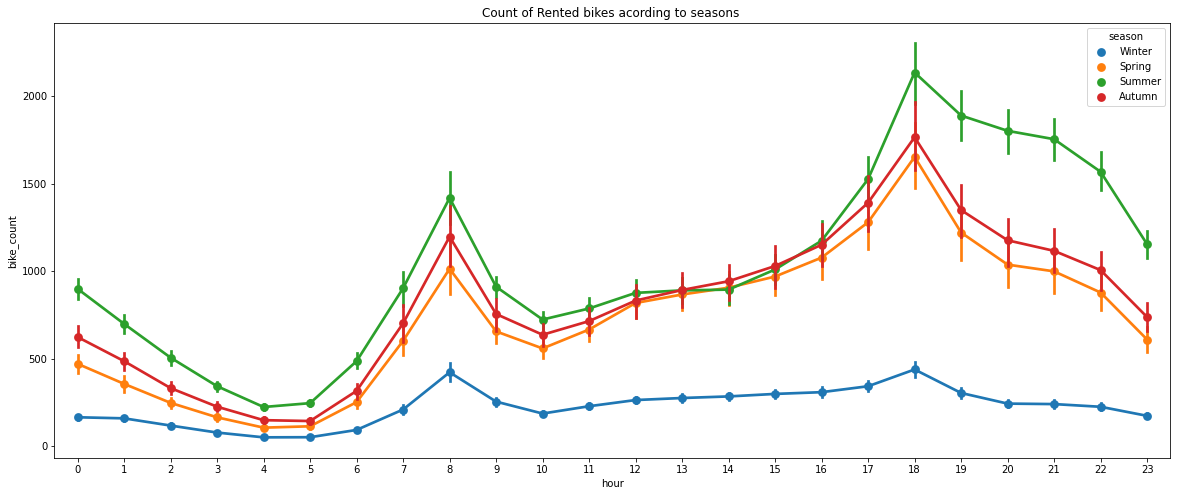

In [22]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='hour',y='bike_count',hue='season',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

### **Bike rent count on functioning day or Non functioning day**

In [23]:
df_func=data.groupby(['functioning_day'])['bike_count'].sum()
df_func

functioning_day
No           0
Yes    6172314
Name: bike_count, dtype: int64

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

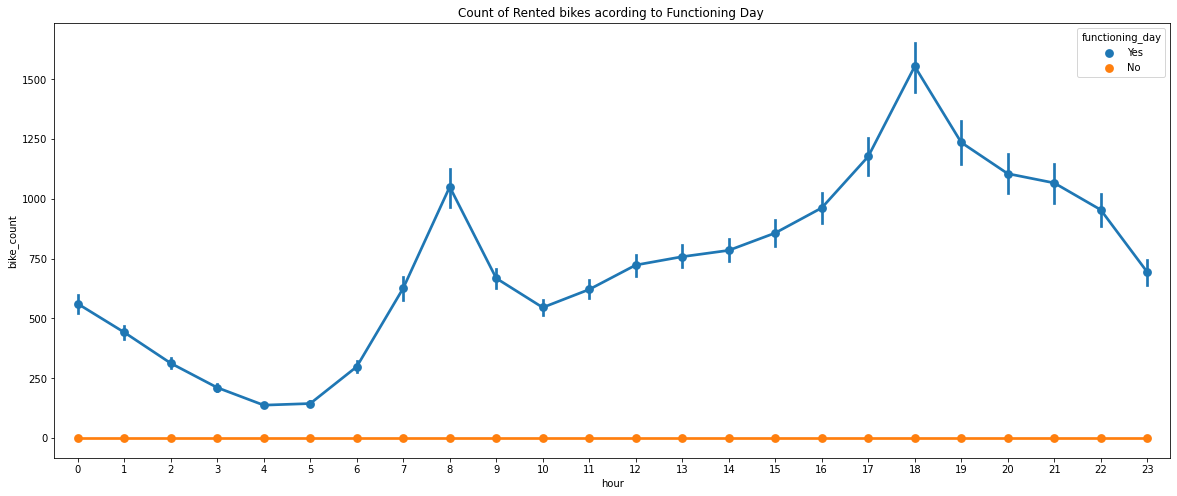

In [24]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='hour',y='bike_count',hue='functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

## **Continuous Feature Analysis**

### **Bike rent count over temperature**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Temperature ')]

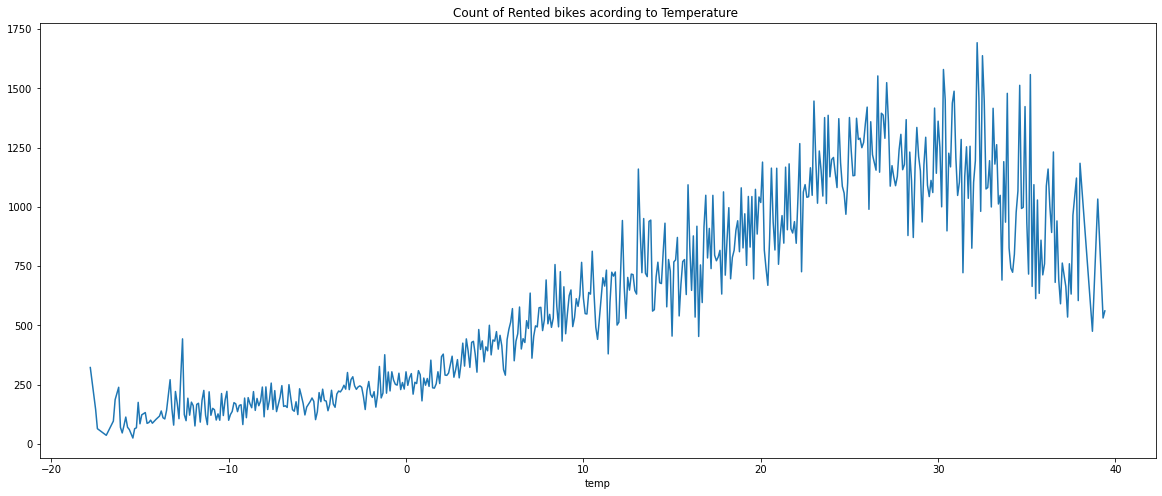

In [25]:
fig,ax=plt.subplots(figsize=(20,8))
data.groupby('temp').mean()['bike_count'].plot(ax=ax)
ax.set(title='Count of Rented bikes acording to Temperature ')

### **Bike rent count over Snowfall**

[Text(0.5, 1.0, 'Count of Rented bikes over Snowfall ')]

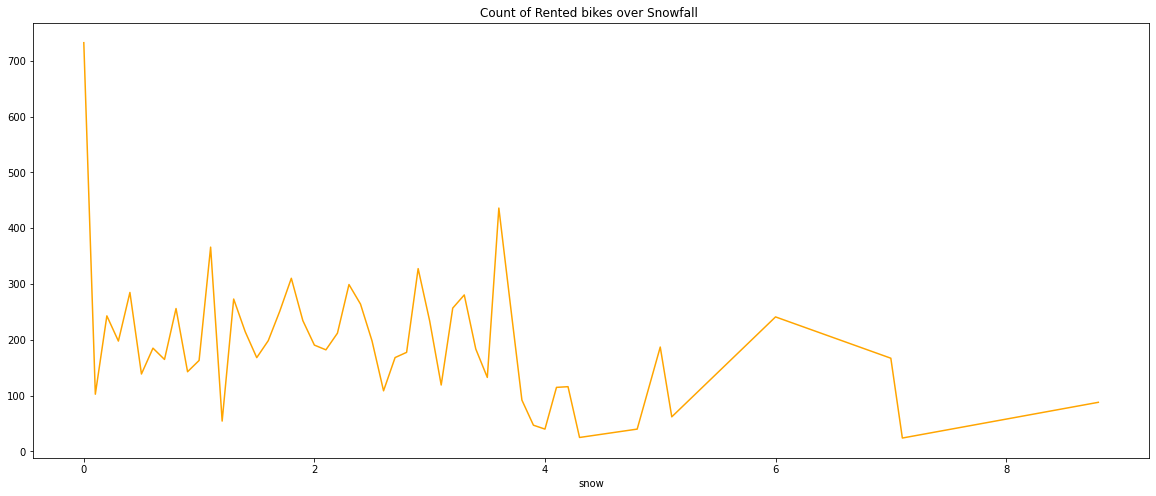

In [26]:
fig,ax=plt.subplots(figsize=(20,8))
data.groupby('snow').mean()['bike_count'].plot(ax=ax,color='orange')
ax.set(title='Count of Rented bikes over Snowfall ')

### **Bike rent count over Rainfall**

[Text(0.5, 1.0, 'Count of Rented bikes over Rainfall ')]

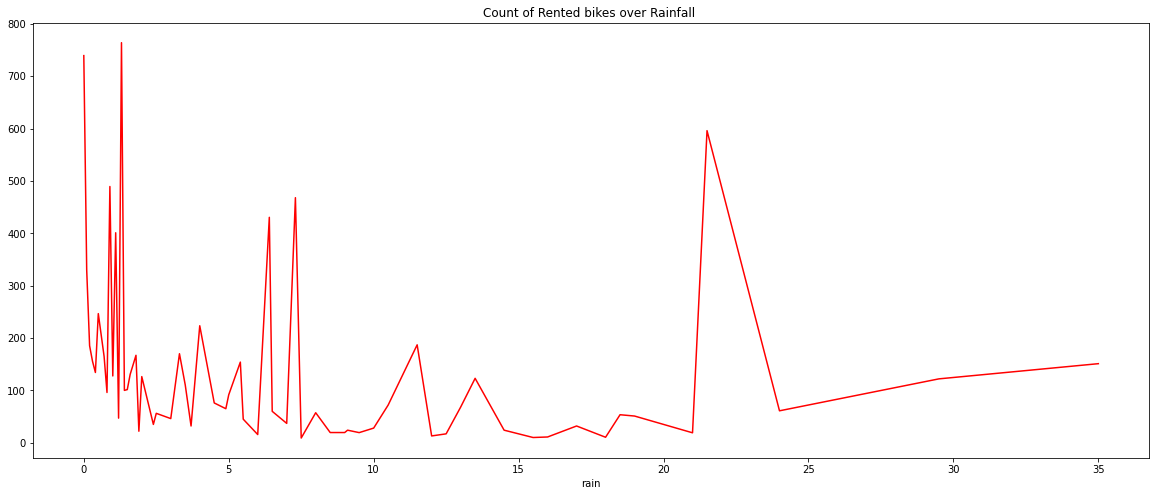

In [27]:
fig,ax=plt.subplots(figsize=(20,8))
data.groupby('rain').mean()['bike_count'].plot(ax=ax,color='r')
ax.set(title='Count of Rented bikes over Rainfall ')

### **Bike rent count over Sunlight**

[Text(0.5, 1.0, 'Count of Rented bikes over Solar Radiation ')]

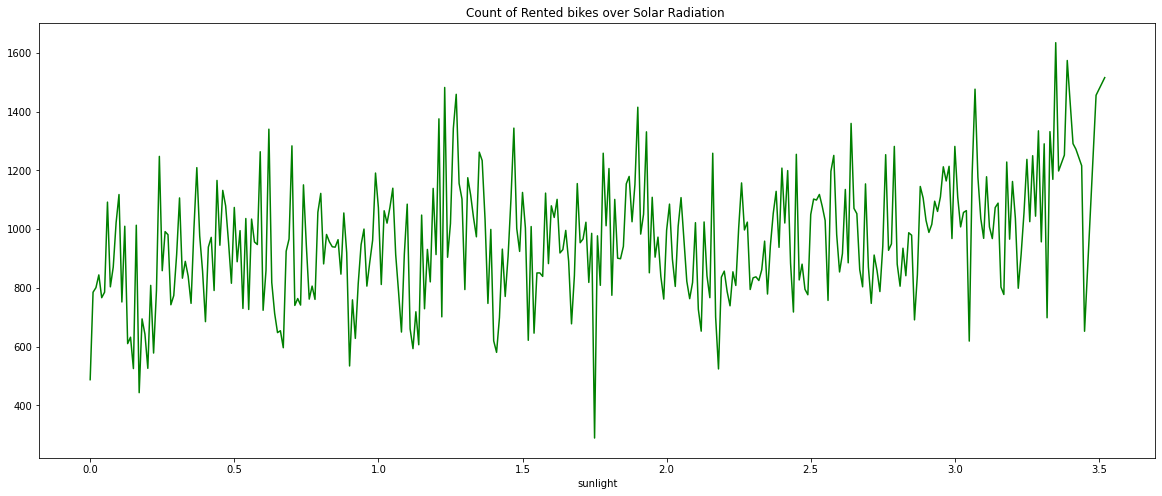

In [28]:
fig,ax=plt.subplots(figsize=(20,8))
data.groupby('sunlight').mean()['bike_count'].plot(ax=ax,color='green')
ax.set(title='Count of Rented bikes over Solar Radiation ')

### **Bike rent count over Visibility**

[Text(0.5, 1.0, 'Count of Rented bikes over Visibility ')]

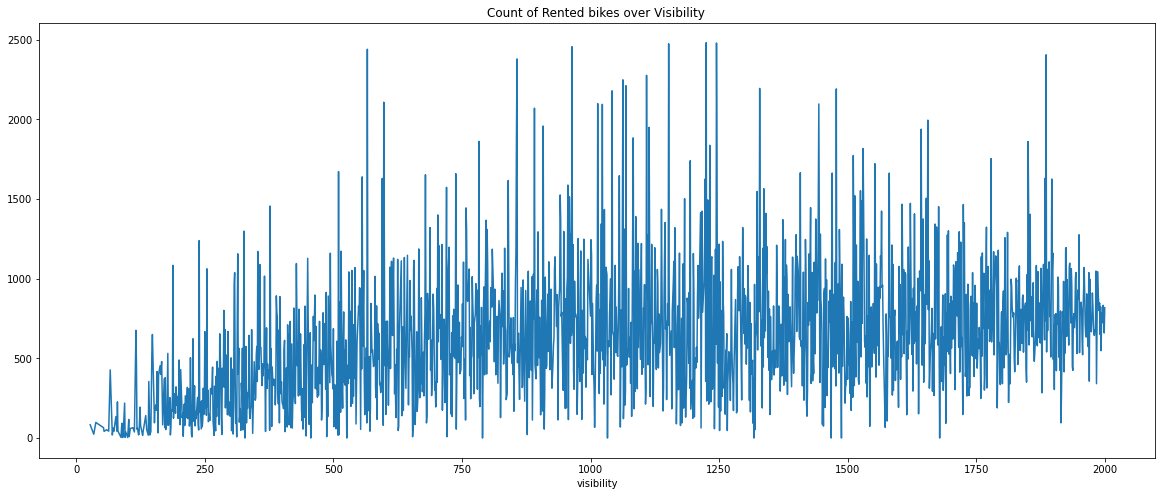

In [29]:
fig,ax=plt.subplots(figsize=(20,8))
data.groupby('visibility').mean()['bike_count'].plot(ax=ax)
ax.set(title='Count of Rented bikes over Visibility ')

### **Bike rent count over Humidity**

[Text(0.5, 1.0, 'Count of Rented bikes over Humidity ')]

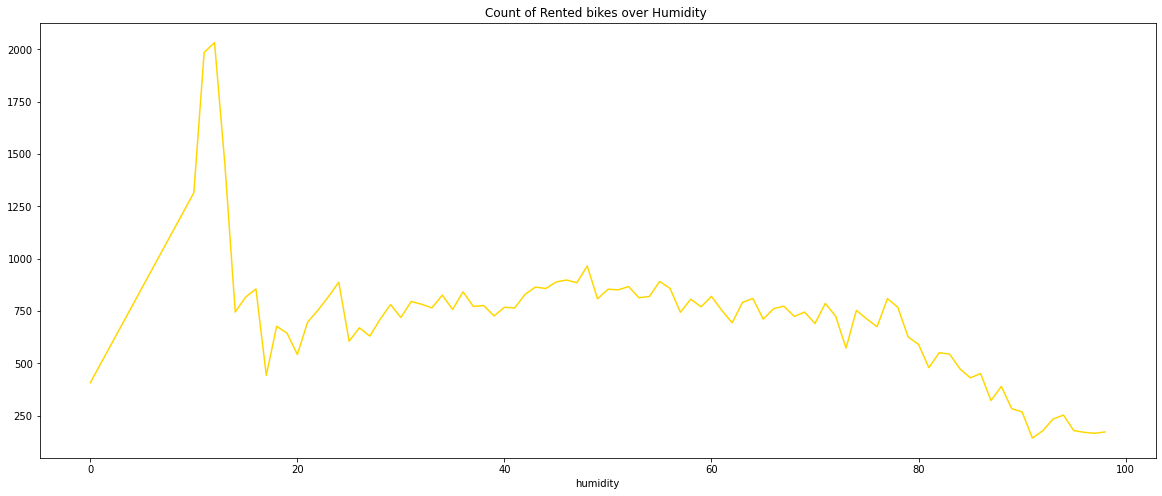

In [30]:
fig,ax=plt.subplots(figsize=(20,8))
data.groupby('humidity').mean()['bike_count'].plot(ax=ax,color='gold')
ax.set(title='Count of Rented bikes over Humidity ')

### **Bike rent count over wind speed**

[Text(0.5, 1.0, 'Count of Rented bikes over Wind Speed ')]

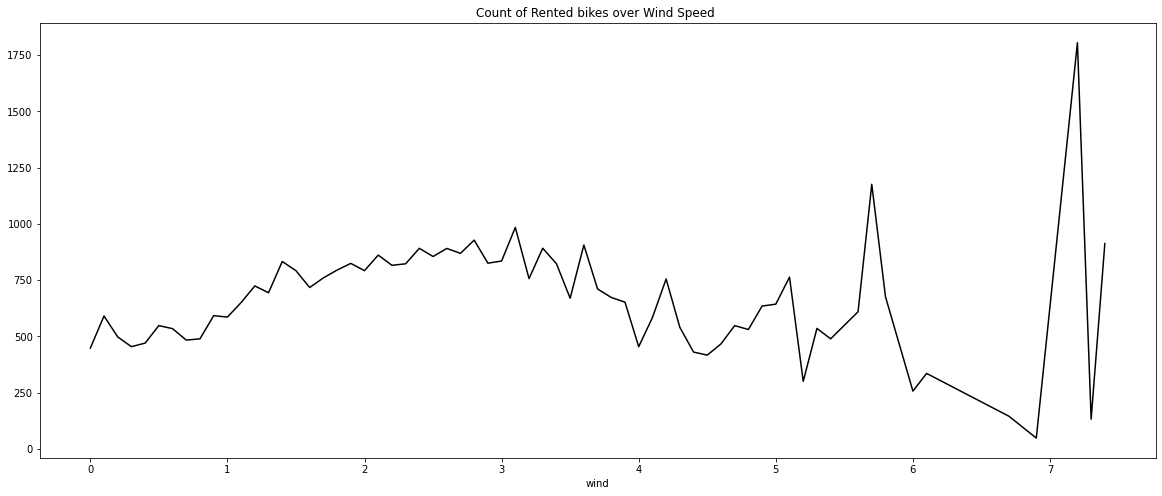

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
data.groupby('wind').mean()['bike_count'].plot(ax=ax,color='black')
ax.set(title='Count of Rented bikes over Wind Speed ')

# **3. Feature Engineering**

### **Distribution of target variable**

A dependent variable is a variable whose value will change or depending on the value of another variable. Here our dependent variable is **bike_count.**


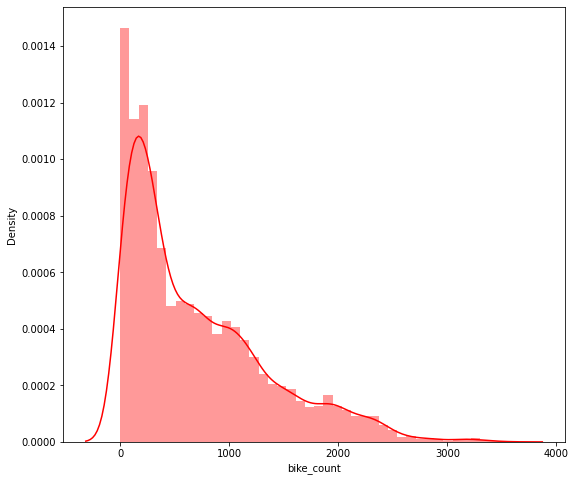

In [32]:
# first we check the distribution of target variable

plt.figure(figsize=(9,8))
sns.distplot(data['bike_count'],color="r")


**we found that the target variable is left skewed, hence we will do squareroot transformation. So that we can study on the target variable.**

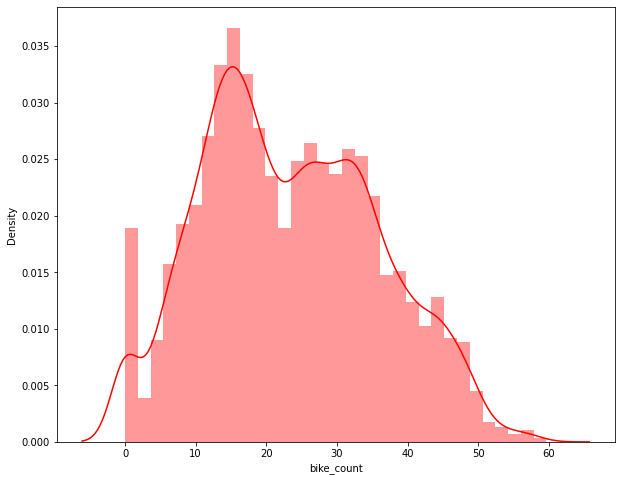

In [33]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(data['bike_count']),color="r")

**After square root transformation, the target variable is converted into normal distribution and its analysis is easy.**

## **Creating copy and rest analysis will be done on copy dataset**

In [34]:
data_new = data.copy()

In [35]:
#feature engg to covert days in numeric, day start with monday

days= {'Sunday':7,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

def get_days(x):
  return days[x]

In [36]:
#Date columns to Date format conversion

data_new['date']= pd.to_datetime(data_new['date'])

In [37]:
# extracting day,month, day of week and weekdays/weekend from date column

data_new['Date']=pd.to_datetime(data_new['date'])

data_new['month'] = data_new['date'].apply(lambda x : x.month)

data_new['day_of_week'] = data_new['date'].dt.day_name()

In [38]:
data_new['weekdays_weekend']=data_new['day_of_week'].apply(lambda x : get_days(x))

In [39]:
data_new.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,Date,month,day_of_week,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12,1,Thursday,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12,1,Thursday,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12,1,Thursday,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12,1,Thursday,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12,1,Thursday,4


In [40]:
# Date column is twice so we will drop one column along with days_of_week column

data_new=data_new.drop(columns=['Date','day_of_week'],axis=1)

In [41]:
data_new.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,month,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4


In [42]:
data_new['weekdays_weekend'].unique()

array([4, 7, 3, 5, 1, 6, 2])

days number start with 1 that is monday and ends with 7 that is sunday.

In [43]:
data_new['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Month number 1 to 12 indicates January to December.

## **Continuous Features Engineering**


**Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type**

In [44]:
#temp, humidity, wind, visiblity, dew_temp, sunlight, rainfall, Snowfall are numerica feature so they are classified as continuous features

continous_features = ['temp', 'humidity', 'dew_temp','wind', 'visibility',  'sunlight', 'rain', 'snow']
continous_features

['temp',
 'humidity',
 'dew_temp',
 'wind',
 'visibility',
 'sunlight',
 'rain',
 'snow']

In [45]:
data_new.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,month,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4


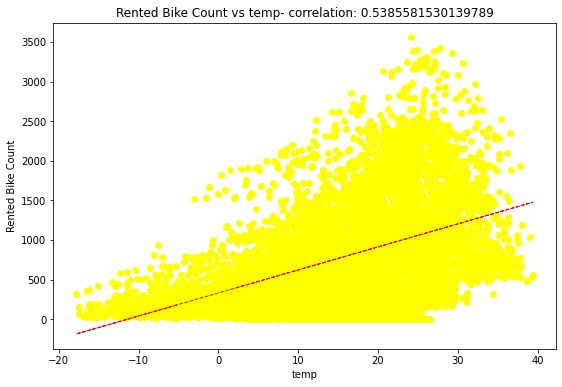

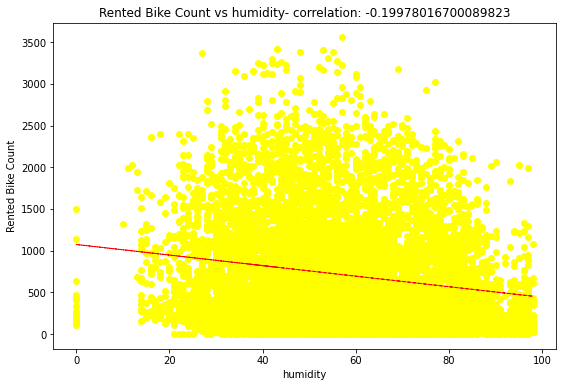

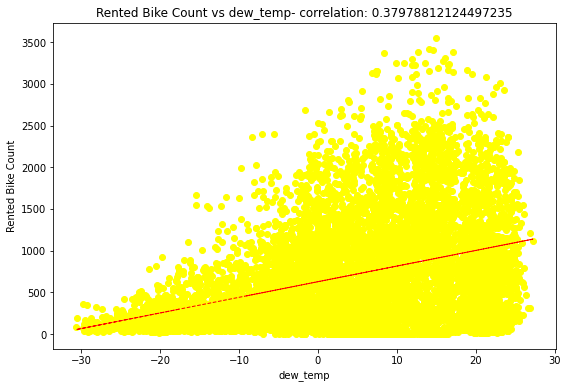

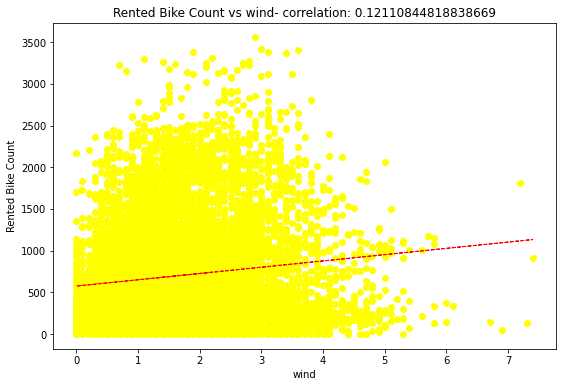

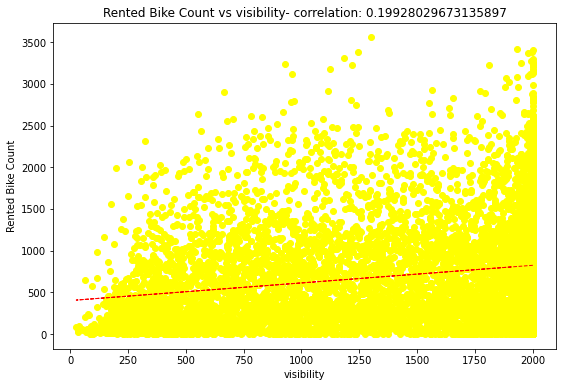

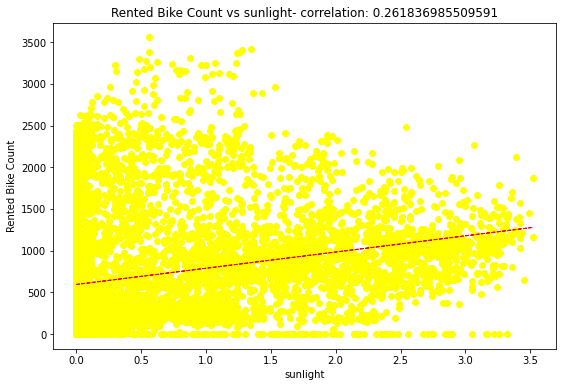

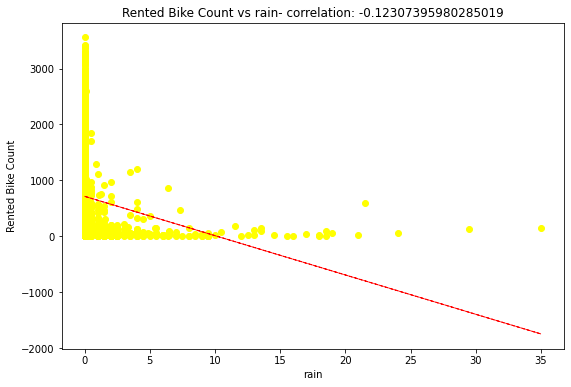

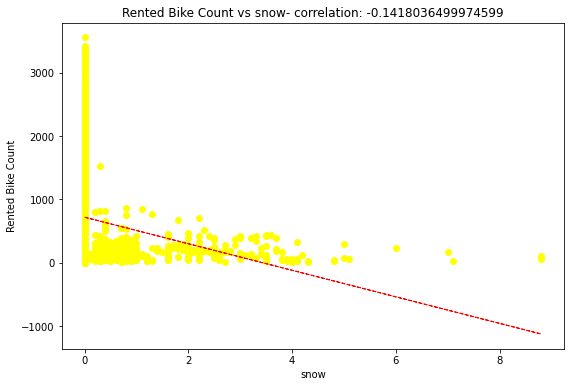

In [46]:
#check for continous feature vs target variable

for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    continous_feature = data_new[col]
    label = data_new['bike_count']
    correlation = continous_feature.corr(label)
    plt.scatter(x=continous_feature, y=label,color='yellow')
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data_new[col], data_new['bike_count'], 1)
    y_hat = np.poly1d(z)(data_new[col])

    plt.plot(data_new[col], y_hat, "r--", lw=1)

plt.show()

## **Correlation between different variables**

**we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

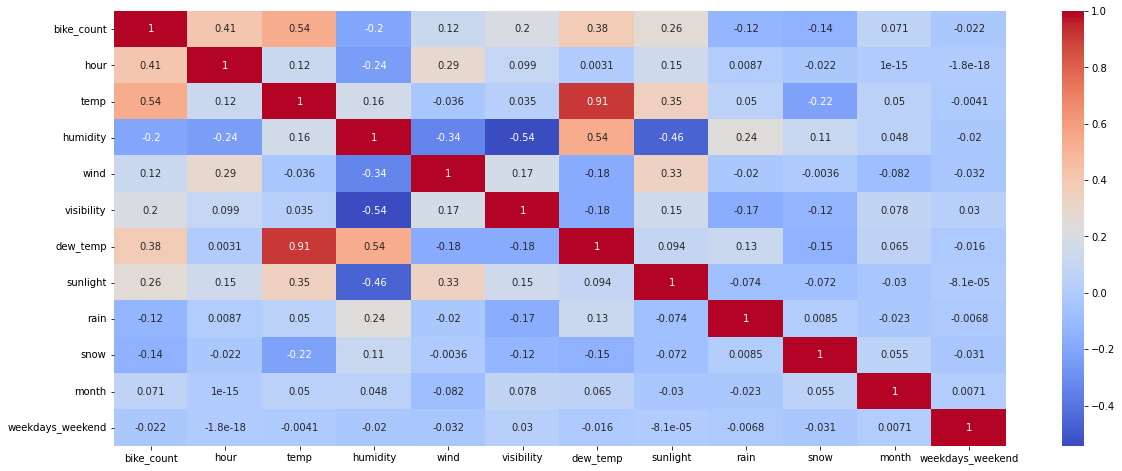

In [47]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=data_new.corr()

sns.heatmap((correlation), annot=True,cmap='coolwarm')

We can observe on the heatmap that on the target variable line the most 

Positively correlated variables to the rent are :

**the temperature**

**the dew point temperature**

**the solar radiation**


And most negatively correlated variables are:

**Humidity**

**Rainfall**

**From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91. So we will replace temprature column with new values like given below.**

In [48]:
data_new['temp'] = 0.6*data_new['temp'] + 0.4*data_new['dew_temp']

In [49]:
data_new.drop(columns=['dew_temp'],inplace=True)

In [50]:
data_new.head()

,date,bike_count,hour,temp,humidity,wind,visibility,sunlight,rain,snow,season,holiday,functioning_day,month,weekdays_weekend
0,2017-01-12,254,0,-10.16,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
1,2017-01-12,204,1,-10.34,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
2,2017-01-12,173,2,-10.68,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
3,2017-01-12,107,3,-10.76,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
4,2017-01-12,78,4,-11.04,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4


## **Categorical Features Engineering**

In [51]:
categorical_features = ['hour','season','holiday','functioning_day', 'month', 'weekdays_weekend']

In [52]:
categorical_features_df= pd.DataFrame(data_new[categorical_features])

In [53]:
categorical_features_df.head()

,hour,season,holiday,functioning_day,month,weekdays_weekend
0,0,Winter,No Holiday,Yes,1,4
1,1,Winter,No Holiday,Yes,1,4
2,2,Winter,No Holiday,Yes,1,4
3,3,Winter,No Holiday,Yes,1,4
4,4,Winter,No Holiday,Yes,1,4


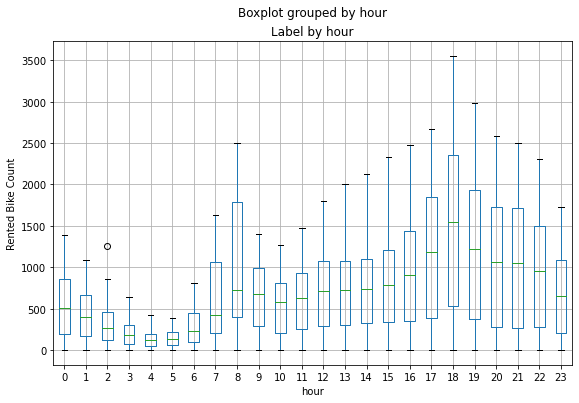

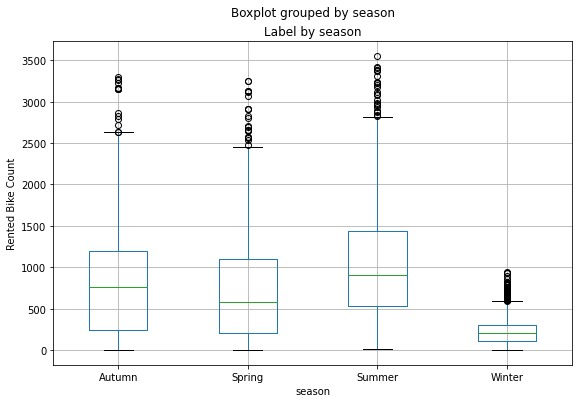

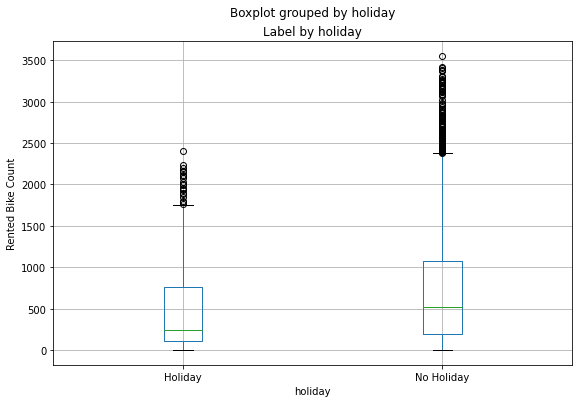

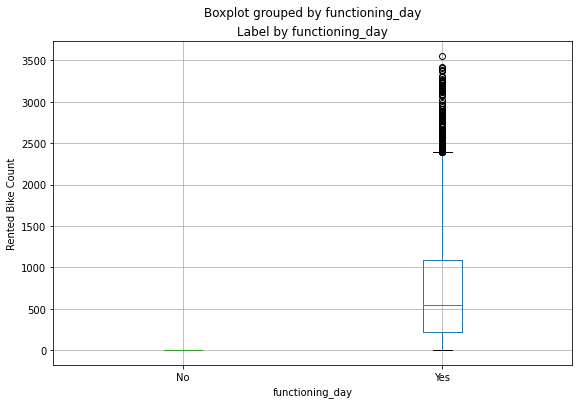

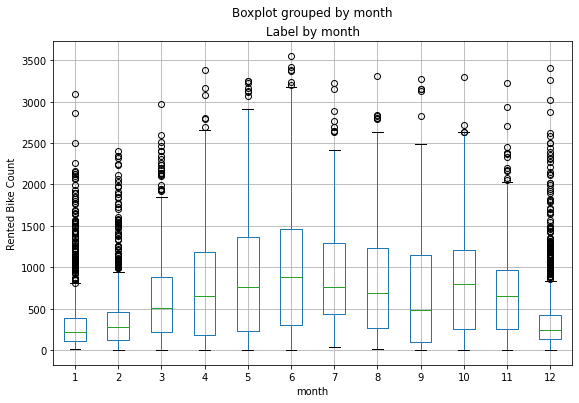

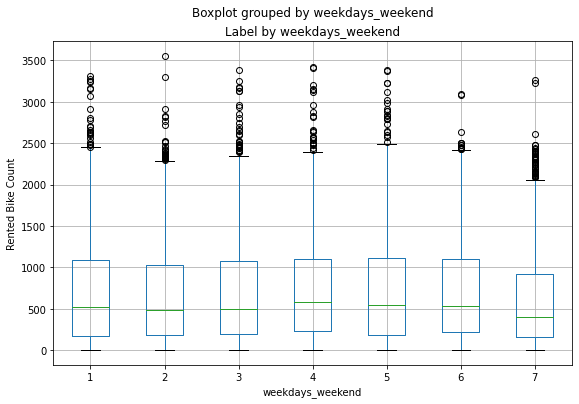

In [54]:
#check variation of categorical features with target variable


for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data_new.boxplot(column = 'bike_count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [55]:
data_new.head()

,date,bike_count,hour,temp,humidity,wind,visibility,sunlight,rain,snow,season,holiday,functioning_day,month,weekdays_weekend
0,2017-01-12,254,0,-10.16,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
1,2017-01-12,204,1,-10.34,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
2,2017-01-12,173,2,-10.68,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
3,2017-01-12,107,3,-10.76,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4
4,2017-01-12,78,4,-11.04,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,4


### **Encoding Categorical variables into numerical variables**

In [56]:
#Encoding of categorical features

data_new['holiday'] = data_new['holiday'].apply(lambda x : 1 if x == 'Holiday' else 0)

In [57]:

data_new['functioning_day'] = data_new['functioning_day'].apply(lambda x : 1 if x == 'Yes' else 0)

In [58]:
data_new = pd.get_dummies(data_new, columns=["season"], prefix=["season"])

In [59]:
categorical_features = ['hour','holiday','functioning_day', 'month', 'weekdays_weekend', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']

In [60]:
continous_final_features = ['humidity', 'wind', 'visibility', 'sunlight', 'rain', 'snow', 'temp']
categorical_final_features = ['hour','holiday','functioning_day', 'month', 'weekdays_weekend', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']


In [61]:
#final features which are going to be used as independent variable for our models
final_features = continous_final_features + categorical_final_features
final_features

['humidity',
 'wind',
 'visibility',
 'sunlight',
 'rain',
 'snow',
 'temp',
 'hour',
 'holiday',
 'functioning_day',
 'month',
 'weekdays_weekend',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [62]:
len(final_features)

16

In [63]:
data_new.head()

,date,bike_count,hour,temp,humidity,wind,visibility,sunlight,rain,snow,holiday,functioning_day,month,weekdays_weekend,season_Autumn,season_Spring,season_Summer,season_Winter
0,2017-01-12,254,0,-10.16,37,2.2,2000,0.0,0.0,0.0,0,1,1,4,0,0,0,1
1,2017-01-12,204,1,-10.34,38,0.8,2000,0.0,0.0,0.0,0,1,1,4,0,0,0,1
2,2017-01-12,173,2,-10.68,39,1.0,2000,0.0,0.0,0.0,0,1,1,4,0,0,0,1
3,2017-01-12,107,3,-10.76,40,0.9,2000,0.0,0.0,0.0,0,1,1,4,0,0,0,1
4,2017-01-12,78,4,-11.04,36,2.3,2000,0.0,0.0,0.0,0,1,1,4,0,0,0,1


# **4. Model Implementation**

## **Model Building Pre-requisite**

### **Transformation of Dataset**

In [87]:
#transformation of data 
from scipy.stats import zscore
#Train test split
X = data_new[final_features].apply(zscore)

In [88]:
#sqrt transformation of target variable
y = np.sqrt(data_new['bike_count'])

In [89]:
#create a function to compute Evaluation matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
score = pd.DataFrame(index = ['MSE', 'RMSE', 'r2', 'Adjusted r2'])
def get_evaluation_matrix(y_test, y_pred):
  
  MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
  
  RMSE = np.sqrt(MSE)
  
  r2 = r2_score((y_test)**2, (y_pred)**2)
  
  Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  
  lst = [MSE, RMSE, r2, Adj_r2]
  return lst

### **Splitting train and test data**

In [90]:
#splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


## **Linear Regression**

In [92]:
#import linear regressor 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [93]:
#score
reg.score(X_train, y_train)

0.6541626711997649

In [94]:
#coefficient values
reg.coef_

array([-4.26678777,  0.12452941,  0.11628246, -0.6776353 , -1.64657239,
        0.0367063 ,  6.07505468,  3.38418315, -0.61529001,  5.12507862,
        0.26813101, -0.26238276,  1.40153061,  0.28663758,  0.15609063,
       -1.8527204 ])

In [95]:
#intercept values
reg.intercept_

23.510299572323508

In [96]:
#prediction for linear regression
y_pred = reg.predict(X_test)

In [97]:
print(y_pred)

[18.07391047 25.02386923 18.68045582 ... 14.36013061 32.6277945
 20.54719055]


In [98]:
#Evaluation matrices for linear regression
result = get_evaluation_matrix(y_test,y_pred)
score['Linear regression'] = result
print(score)

             Linear regression
MSE              174647.463842
RMSE                417.908440
r2                    0.582705
Adjusted r2           0.578857


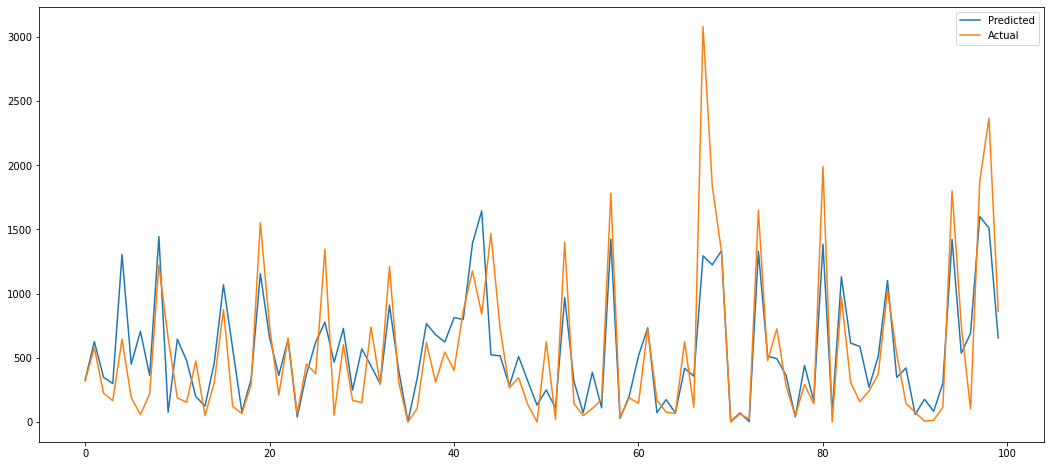

In [101]:
#plot target test and predicted value for linear regression
plt.figure(figsize=(18,8))
plt.plot((y_pred[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## **Lasso**

In [102]:
#import Lasso regressor 
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005)

In [103]:
lasso.score(X_train, y_train)

0.6541583636960264

In [104]:
#coefficient values
lasso.coef_

array([-4.24673942,  0.11736791,  0.11564682, -0.65583831, -1.6432299 ,
        0.02775097,  6.03776814,  3.3855549 , -0.60979785,  5.11731568,
        0.2619737 , -0.25768037,  1.22652795,  0.10712341, -0.        ,
       -2.03370077])

In [107]:
#fitting model
lasso.fit(X_train,y_train)

Lasso(alpha=0.005)

In [108]:
#prediction for Lasso regressio
y_pred_lasso = lasso.predict(X_test)

In [109]:
#Evaluation matrices for Lasso regression
result = get_evaluation_matrix(y_test,y_pred_lasso)
score['Lasso'] = result
print(score)

             Linear regression          Lasso
MSE              174647.463842  174825.180131
RMSE                417.908440     418.121011
r2                    0.582705       0.582280
Adjusted r2           0.578857       0.578428


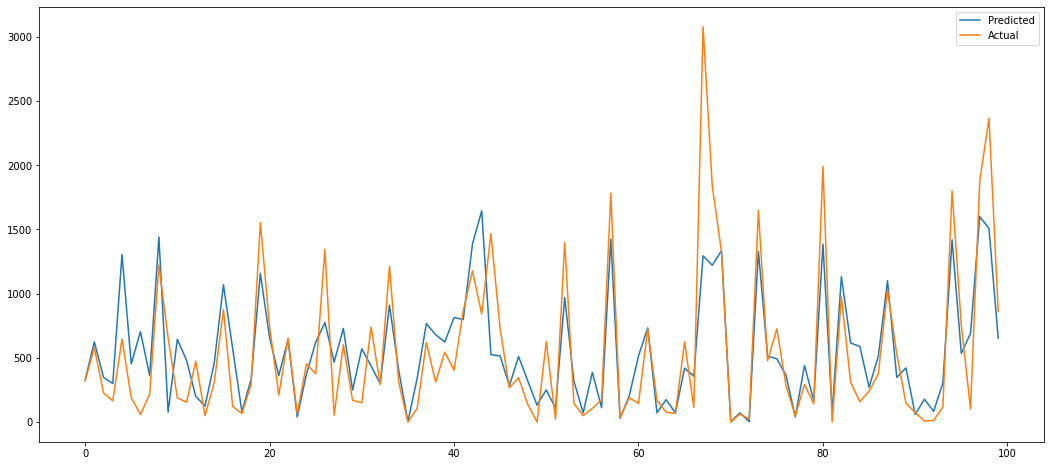

In [111]:
#plot target test and predicted value for Lasso regression
plt.figure(figsize=(18,8))
plt.plot((y_pred_lasso[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## **Ridge**

In [112]:
#import Ridge regressor
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [113]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -53.664390286448864


In [114]:
#prediction for Ridge regression
y_pred_ridge = ridge_regressor.predict(X_test)

In [115]:
#Evaluation matrices for Ridge regression
result = get_evaluation_matrix(y_test,y_pred_ridge)
score['Ridge'] = result
print(score)

             Linear regression          Lasso          Ridge
MSE              174647.463842  174825.180131  174722.154865
RMSE                417.908440     418.121011     417.997793
r2                    0.582705       0.582280       0.582526
Adjusted r2           0.578857       0.578428       0.578676


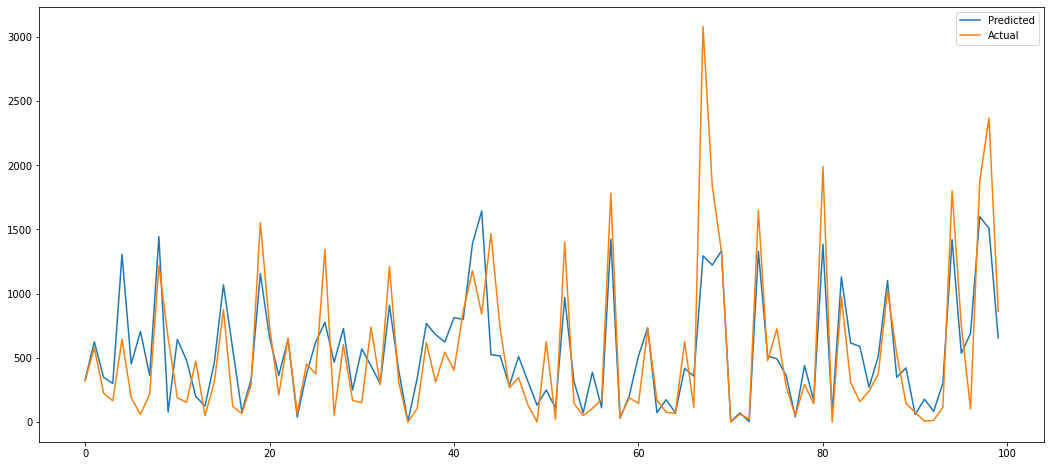

In [116]:
#plot target test and predicted value for Ridge regression
plt.figure(figsize=(18,8))
plt.plot((y_pred_ridge[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## **Descision trees**

In [117]:
#importing decision trees model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
#fitting model
dt_regeressor = DecisionTreeRegressor(random_state = 100)
dt_regeressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=100)

In [118]:
#prediction for DecisionTree 
y_pred_dt = dt_regeressor.predict(X_test)

In [119]:
#Evaluation matrices for DecisionTree
result = get_evaluation_matrix(y_test,y_pred_dt)
score['Decision tree'] = result
print(score)

             Linear regression          Lasso          Ridge  Decision tree
MSE              174647.463842  174825.180131  174722.154865   76672.498858
RMSE                417.908440     418.121011     417.997793     276.897994
r2                    0.582705       0.582280       0.582526       0.816802
Adjusted r2           0.578857       0.578428       0.578676       0.815113


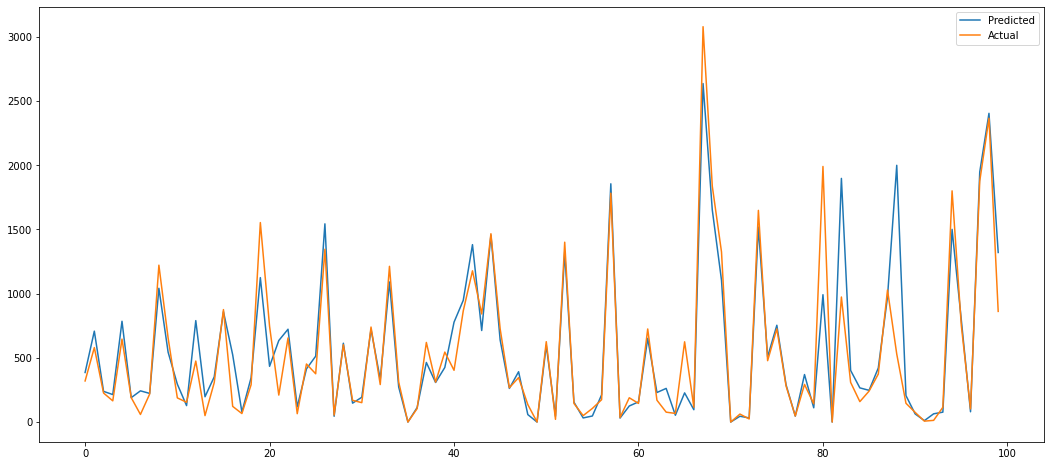

In [120]:
#plot target test and predicted value for DecisionTree
plt.figure(figsize=(18,8))
plt.plot((y_pred_dt[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## **Random Forest**

In [121]:
#import RandomForest Regressor 
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
#fitting model
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [122]:
#prediction for RandomForest
y_pred_rf = regressor_rf.predict(X_test)

In [123]:
#Evaluation matrices for RandomForest 
result = get_evaluation_matrix(y_test,y_pred_rf)
score['Random forest'] = result
print(score)

             Linear regression          Lasso          Ridge  Decision tree  \
MSE              174647.463842  174825.180131  174722.154865   76672.498858   
RMSE                417.908440     418.121011     417.997793     276.897994   
r2                    0.582705       0.582280       0.582526       0.816802   
Adjusted r2           0.578857       0.578428       0.578676       0.815113   

             Random forest  
MSE           41071.282910  
RMSE            202.660511  
r2                0.901866  
Adjusted r2       0.900961  


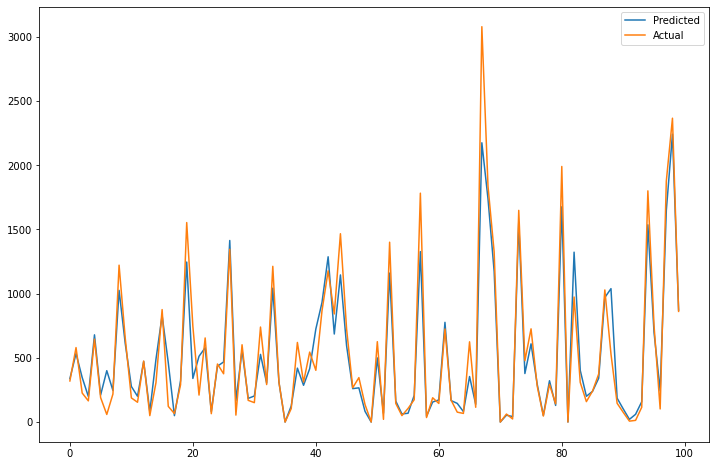

In [141]:
#plot target test and predicted value for RandomForest 
plt.figure(figsize=(12,8))
plt.plot((y_pred_rf[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## **Gradient Boosting Regressor**

In [125]:
#import GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

In [126]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [127]:
#grid search for gradient bossting
gb_regressor= GridSearchCV(gb_model,param_grid=params,verbose=0)

In [128]:
#fitting model
gb_regressor.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [129]:
#prediction for GradientBoosting 
y_pred_gb = gb_regressor.predict(X_test)

In [130]:
#Evaluation matrices for GradientBoosting
result = get_evaluation_matrix(y_test,y_pred_gb)
score['Gradient boosting'] = result
print(score)

             Linear regression          Lasso          Ridge  Decision tree  \
MSE              174647.463842  174825.180131  174722.154865   76672.498858   
RMSE                417.908440     418.121011     417.997793     276.897994   
r2                    0.582705       0.582280       0.582526       0.816802   
Adjusted r2           0.578857       0.578428       0.578676       0.815113   

             Random forest  Gradient boosting  
MSE           41071.282910       39135.806454  
RMSE            202.660511         197.827719  
r2                0.901866           0.906491  
Adjusted r2       0.900961           0.905628  


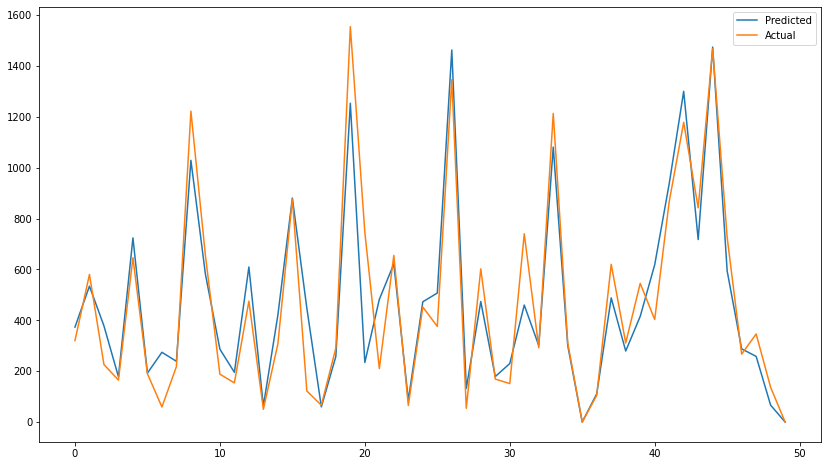

In [142]:
#plot target test and predicted value for GradientBoosting 
plt.figure(figsize=(14,8))
plt.plot((y_pred_gb[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## **Extreme Gradient boost**

In [132]:
#import XGBRegressor
from xgboost import XGBRegressor
xgb_model=XGBRegressor()

In [133]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [134]:
#creating xgb grid model
xgb_regressor= GridSearchCV(xgb_model,param_grid=params,verbose=0)

In [135]:
#fitting model
xgb_regressor.fit(X_train,y_train)

[10:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [136]:
#prediction for XGBRegressor
y_pred_xbg = xgb_regressor.predict(X_test)

In [137]:
#Evaluation matrices for XGBRegressor 
result = get_evaluation_matrix(y_test,y_pred_xbg)
score['Extreme gb'] = result
print(score)

             Linear regression          Lasso          Ridge  Decision tree  \
MSE              174647.463842  174825.180131  174722.154865   76672.498858   
RMSE                417.908440     418.121011     417.997793     276.897994   
r2                    0.582705       0.582280       0.582526       0.816802   
Adjusted r2           0.578857       0.578428       0.578676       0.815113   

             Random forest  Gradient boosting    Extreme gb  
MSE           41071.282910       39135.806454  34281.188727  
RMSE            202.660511         197.827719    185.151799  
r2                0.901866           0.906491      0.918090  
Adjusted r2       0.900961           0.905628      0.917335  


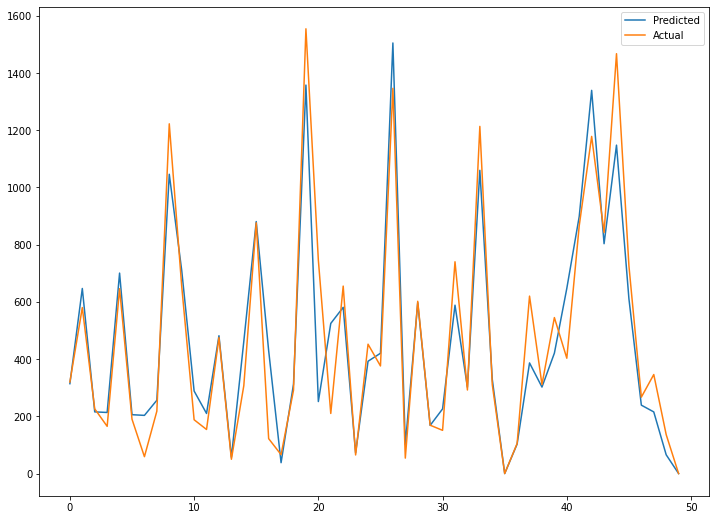

In [144]:
#plot target test and predicted value for XGBRegressor 

plt.figure(figsize=(12,9))
plt.plot((y_pred_xbg[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **5. Model Explainability**

### **Lets compare all the model with their permormance**

In [139]:
#all models evaluation matrices
final_matrices=score.transpose().reset_index().rename(columns={'index':'Models'})

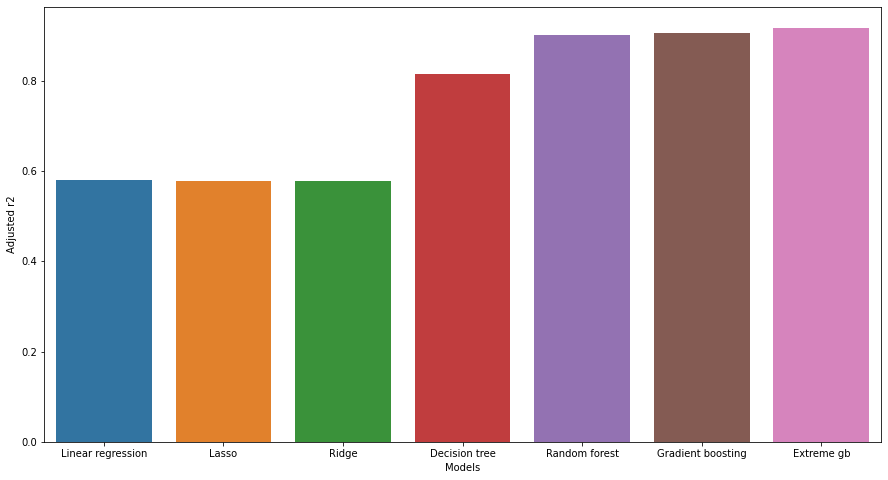

In [145]:
#plot afj r2 scores for all model
plt.figure(figsize=(15,8))
sns.barplot(x='Models',y='Adjusted r2',data=final_matrices)

From above chart we can connclude that gradient boosting techniques are performing good and best fits our model
We can choose Light Gradient Boosting for our model due to its performance score with Adjusted R2 score of 91.9%
Shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 23.7 MB/s 


In [ ]:
#import shap 
from sklearn.tree import export_graphviz

import shap
import graphviz
sns.set_style('darkgrid')

In [ ]:
for_instance = 3

### **For Linear Regression**

In [ ]:
# shape for LGB model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer_lm = shap.LinearExplainer(reg, X_test)
# obtain shap values for the first row of the test data
lm_shap_values = explainer_lm.shap_values(X_test)
# # visualize the first prediction's explanation with a force plot
shap.force_plot(explainer_lm.expected_value, lm_shap_values[0,], X_test.iloc[0,])

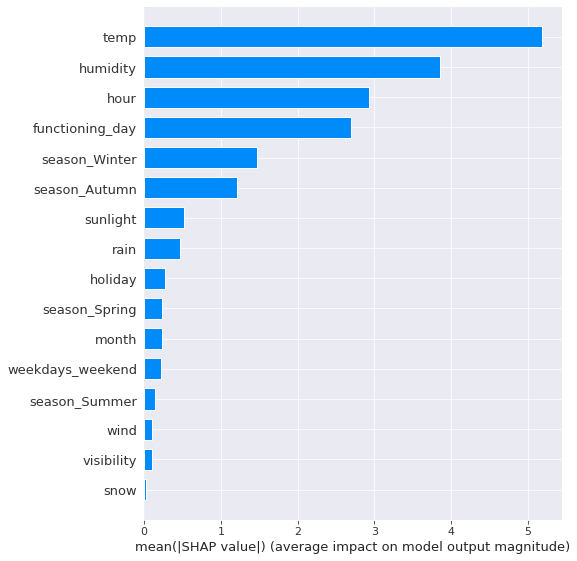

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(lm_shap_values, X_train, plot_type="bar")

### **Shap for Decision Tree**

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer_dt = shap.TreeExplainer(dt_regeressor)
# obtain shap values for the first row of the test data
dt_shap_values = explainer_dt.shap_values(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.force_plot(explainer_dt.expected_value[0], dt_shap_values[0], X_test.iloc[0])

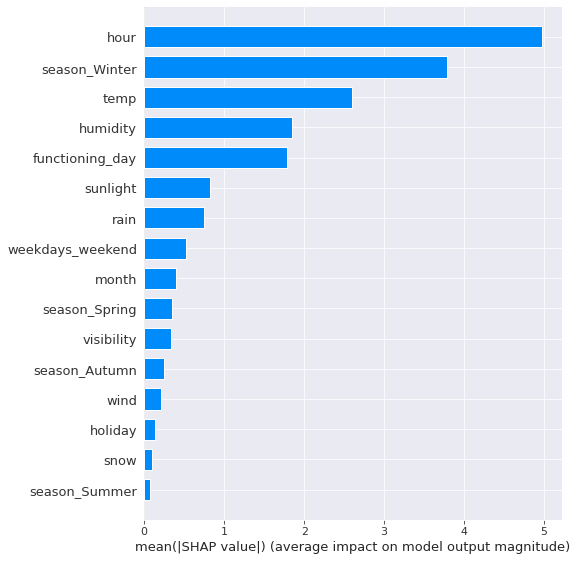

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(dt_shap_values, X_train, plot_type="bar")

### **Shap for Random forest model**

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer_rf = shap.TreeExplainer(regressor_rf)
# obtain shap values for the first row of the test data
rf_shap_values = explainer_rf.shap_values(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.force_plot(explainer_rf.expected_value[0,], rf_shap_values[0,], X_test.iloc[0,])

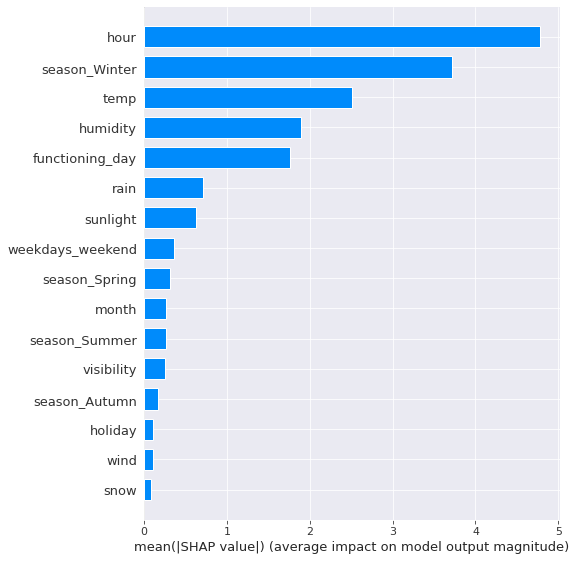

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(rf_shap_values, X_train, plot_type="bar")

### **Eli5**

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 3.5 MB/s 
     |████████████████████████████████| 133 kB 49.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a1fde4e7cf096a601524843fd5d2344ed84e7412fad8a61c6e757239a7eae2c4
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
#import eli5
import eli5 as eli
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

### **Eli5 for xgboost model**

In [ ]:
 
eli.show_prediction(xgb_regressor.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

# **Conclusion**

Functioning day is the most influencing feature and temperature is at the second place for LinearRegressor.

Temperature is the most important feature for DecisionTree, RandomForest and GradientBoosting Regressor.

Functioning day is the most important feature and Winter is the second most for XGBoostRegressor.

RMSE Comparisons:

LinearRegressor RMSE : 370.46

DecissionTreeRegressor RMSE : 302.53

RandomForestRegressor RMSE : 290.02

XGBoostRegressor RMSE : 242.72

GradientBoostingRegressor RMSE : 248.18

The feature temperature is on the top list for all the regressors except XGBoost.

XGBoost is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results.

XGBoostRegressor has the Least Root Mean Squared Error. So It can be considered as the best model for given problem.


